In [1]:
# Cayden Wagner

IndexError: list index out of range

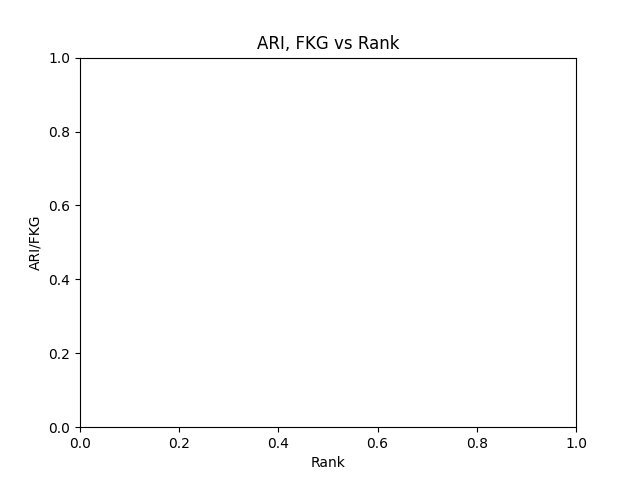

In [157]:
%matplotlib widget
from urllib.request import urlopen
import json
import ipywidgets
import matplotlib.pyplot as plt

widgets = []
yARI = []
yFKG = []
xVals = []
graph = plt.subplot()
push = 0

def printBooks(item = None):
    global push
    if None == item:
        push = 0
    elif item.description == 'top':
        push = 0
    elif item.description == 'bottom':
        push = len(bookData) - 10
    elif item.description == 'up':
        push += 10
        push = push % len(bookData)
    elif item.description == 'down':
        push -= 10
        if push < 0:
            push = len(bookData) + push
    string = "Books\n\n"
    yARI.clear()
    yFKG.clear()
    xVals.clear()
    for i in range (push, 10 + push):
        string += f'{i+1}. {bookData[i]["bibliography"]["title"]}\n'
        yARI.append(bookData[i]['metrics']['difficulty']['automated readability index'])
        yFKG.append(bookData[i]['metrics']['difficulty']['flesch kincaid grade'])
        xVals.append(i+1)
        
    textBox.rows=string.count('\n')
    textBox.value=string
    
    buildGraph()
    
def buildGraph():
    global graph
    
    [l.remove() for l in graph.lines]
    
    graph.plot(xVals, yARI, yFKG)
    
with open('data/bookData.json', encoding='utf-8') as inFile:
    bookData = json.load(inFile)
        
index = 0
for i in range(0, len(bookData))
    yARI.append(bookData[i]['metrics']['difficulty']['automated readability index'])
    yFKG.append(bookData[i]['metrics']['difficulty']['flesch kincaid grade'])
    index += 1        

graph.set_ylabel("ARI/FKG")
graph.set_xlabel("Rank")
graph.set_title("ARI, FKG vs Rank")

top_btn = ipywidgets.Button(description = 'top')
bottom_btn = ipywidgets.Button(description = 'bottom')
down_btn = ipywidgets.Button(description = 'down')
up_btn = ipywidgets.Button(description = 'up')
SortF_btn = ipywidgets.Button(description = 'Sort: Forward')
SortR_btn = ipywidgets.Button(description = 'Sort: Reverse')
textBox = ipywidgets.Textarea(value='',
                              rows=textBox.value.count('\n'),
                              disabled=True, 
                              layout=ipywidgets.Layout(height='100%', width="100%"))

avgAll = ipywidgets.Text(value='', description='AVG Ari (All):', disabled=True)
avgS = ipywidgets.Text(value='', description='AVG Ari (Sample):', disabled=True)

top_btn.on_click(printBooks)
bottom_btn.on_click(printBooks)
up_btn.on_click(printBooks)
down_btn.on_click(printBooks)
printBooks()

widgets.append(ipywidgets.HBox( [top_btn, bottom_btn, down_btn, up_btn] ))
widgets.append(ipywidgets.HBox( [SortF_btn, SortR_btn] ))
widgets.append(ipywidgets.HBox( [textBox] ))
widgets.append(ipywidgets.HBox( [avgAll] ))
widgets.append(ipywidgets.HBox( [avgS] ))

ipywidgets.VBox(widgets)